#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import wandb

from scipy.spatial.distance import euclidean, cityblock, mahalanobis, chebyshev


In [13]:
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [14]:
wandb.init(
    entity="sergsucksateverything-a",
    project="distance-based-classification"
)


In [15]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('img/Plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_PLAIN	 ## Font type
font_scale = 1  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x,y), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

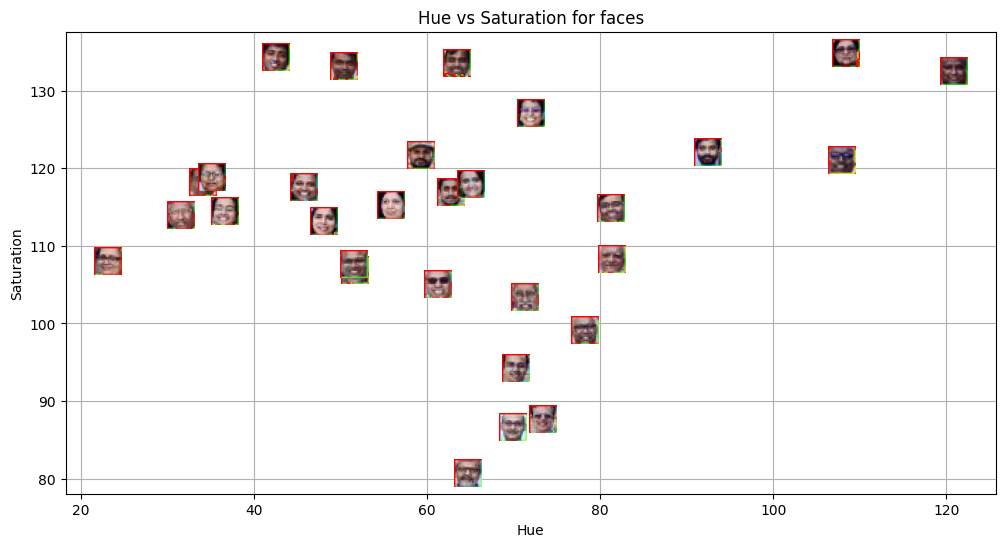

In [16]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(2, n_init=15)
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue vs Saturation for faces')
plt.grid()

wandb.log({"Plaksha Faculty Plot": wandb.Image(plt)})
plt.show()



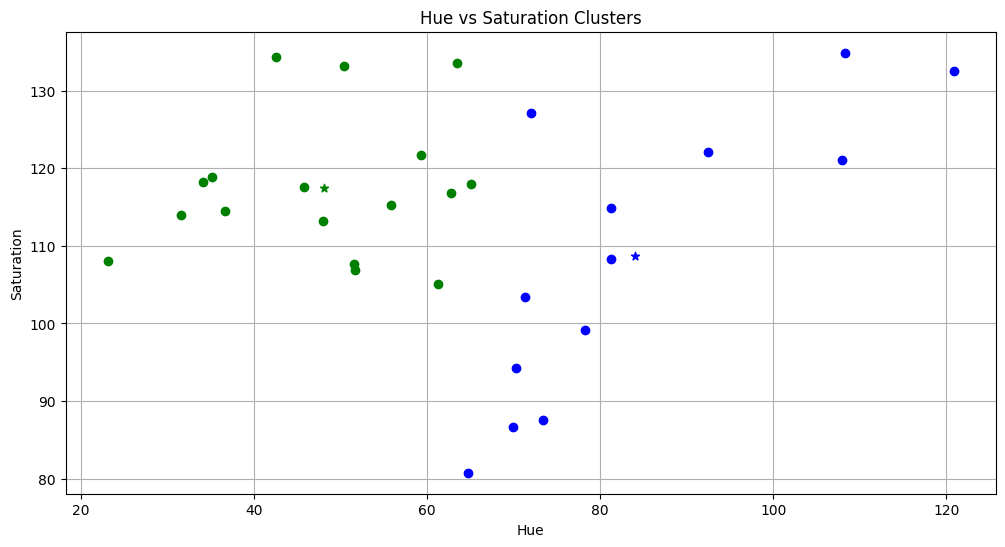

In [17]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue')

#Calculate and plot centroids
centroid_0 = (cluster_0_points[:, 0].mean(), cluster_0_points[:, 1].mean())
centroid_1 = (cluster_1_points[:, 0].mean(), cluster_1_points[:, 1].mean())


# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='*')
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='*')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue vs Saturation Clusters')
plt.grid()

wandb.log({"Plaksha Faculty Clusters": wandb.Image(plt)})
plt.show()

In [18]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('img/Dr_Shashi_Tharoor.jpg')
gray_template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Detect face in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(gray_template_img, 1.05, 4, minSize=(25,25))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
cv2.imshow("Faces", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

print()

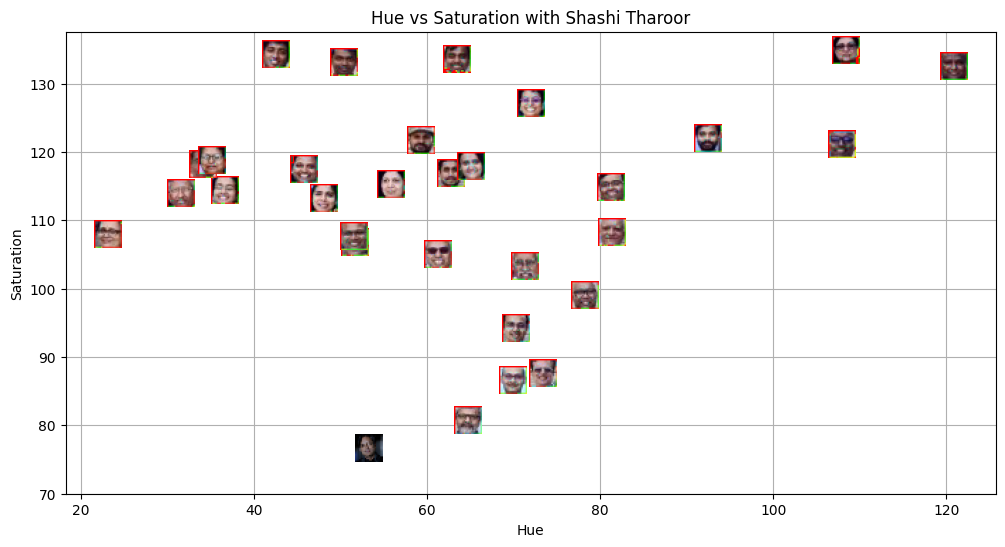

In [19]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
x, y, w, h = template_faces[0]
face = template_hsv[y:y + h, x:x + w]
template_hue = np.mean(face[:, :, 0])
template_saturation = np.mean(face[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
point = [template_hue, template_saturation]
template_label = kmeans.predict([point])[0]

cluster_center = kmeans.cluster_centers_[template_label]
euclidean_dist = euclidean(point, cluster_center)
manhattan_dist = cityblock(point, cluster_center)
chebyshev_dist = chebyshev(point, cluster_center)

wandb.log({"Euclidean Distance": euclidean_dist, 
           "Manhattan Distance": manhattan_dist, 
           "Chebyshev Distance": chebyshev_dist})

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.ylim(bottom=70)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Hue vs Saturation with Shashi Tharoor")
plt.grid()

wandb.log({"Hue vs Saturation with Shashi Tharoor": wandb.Image(plt)})

plt.show()

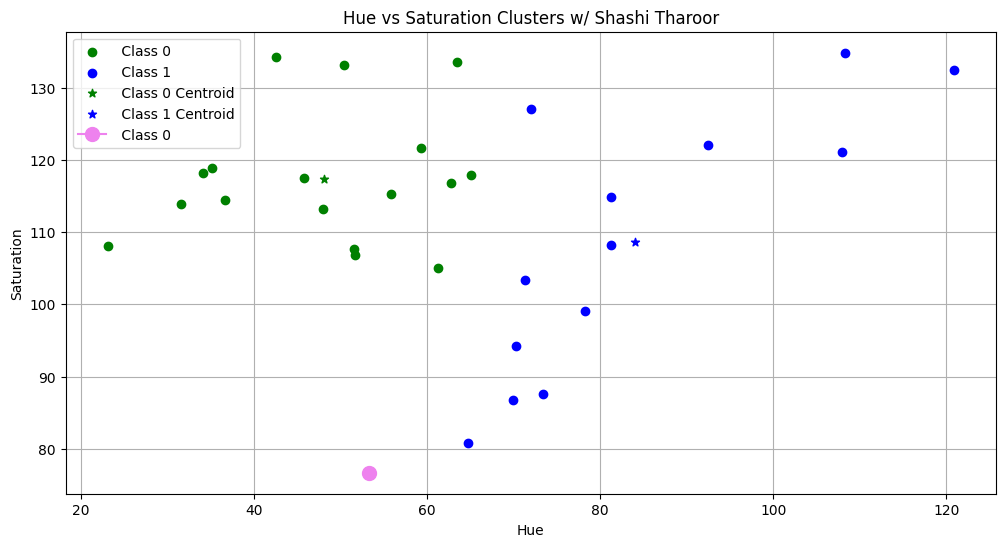

In [21]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label=' Class 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label=' Class 1')

# Calculate and plot centroids for both the clusters
centroid_0 = (cluster_0_points[:, 0].mean(), cluster_0_points[:, 1].mean())
centroid_1 = (cluster_1_points[:, 0].mean(), cluster_1_points[:, 1].mean())
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='*', label=' Class 0 Centroid')
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='*', label=' Class 1 Centroid')
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=f' Class {template_label}' )

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Hue vs Saturation Clusters w/ Shashi Tharoor")
plt.legend()
plt.grid()

wandb.log({"Hue vs Saturation Clusters w/ Shashi Tharoor": wandb.Image(plt)})

plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Some common distance metrics Euclidian Distance, Mahalonobis Distance, Manhattan Distance, Chebyshev Distance, Cosine Distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
Some real world applications of distance based clssification algorithms are for classification based on similarity. This is used in applications such as face recognition, object recognition, medical diagnoses etc. 

#### 3. Explain various distance metrics. 
Euclidian Distance: It is the shortest distance between 2 points. It is the most widely used one due to its simplicity and ease. 

Mahalonobis Distance: It is the distance when taking variance into account. It measures how many standard deviations away 2 points are from each other.

Manhattan Distance: It is the distance when measured along the axes at right angles. It is used in higher dimensions as it works better due to sparcity. 

Chebyshev Distance: It is the distance when measured by the greatest difference in any dimension. 

Cosine Distance: It is the distance when the magnitude of the vector does not matter. It measures the angle, or orientation difference.

#### 4. What is the role of cross validation in model performance? 
Cross validation changes the makeup of the train set in order to prevent overfitting

#### 5. Explain variance and bias in terms of KNN? 
In KNN, we need to pick K to minimize bias and variance. A high value of K will cause variance, as it will always pick the nearest point which could lead to a lot of noise. This is overfitting. A low value of K will cause bias, as it will always pick a similar overly simplistic value which is heavily influenced by the makeup of the data. This is underfitting. 